<a href="https://colab.research.google.com/github/sud-hexo/text-to-image/blob/main/trial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers==0.8.0 transformers ftfy
!pip install -qq "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 KB 16.0 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.3.0
    Uninstalling diffusers-0.3.0:
      Successfully uninstalled diffusers-0.3.0


In [2]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [3]:
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline

In [4]:
device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
)
pipe = pipe.to(device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


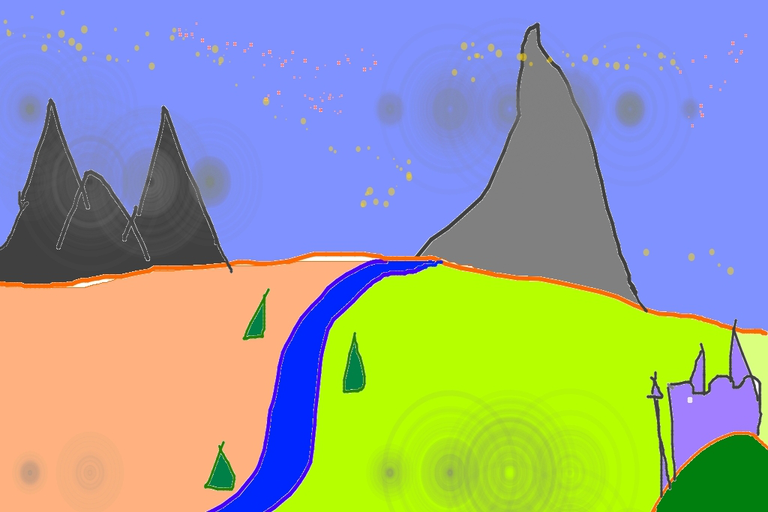

In [12]:
import requests
from io import BytesIO
from PIL import Image

url = f"https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_img = Image.open(BytesIO(response.content)).convert("RGB")
init_img = init_img.resize((768, 512))
init_img

In [16]:
prompt = "Pink Sunflowers"

In [17]:
generator = torch.Generator(device=device).manual_seed(1024)
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.75, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/38 [00:00<?, ?it/s]

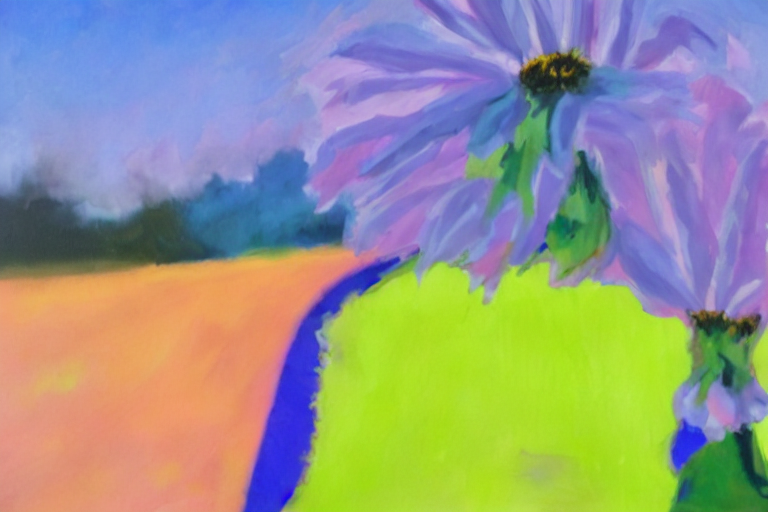

In [18]:
image

In [19]:
## 2nd trial run

In [31]:
import io
import requests
from PIL import Image
r = requests.get('https://raw.githubusercontent.com/sud-hexo/text-to-image/main/image_07941.jpg', stream=True)
aux_im = Image.open(io.BytesIO(r.content))

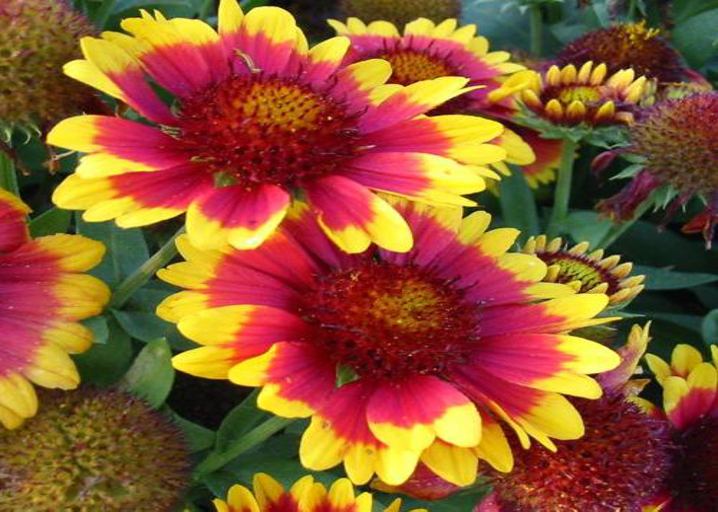

In [32]:
aux_im = aux_im.resize((718, 512))
aux_im

In [33]:
prompt = 'pink sunflowers'
generator = torch.Generator(device=device).manual_seed(1024)
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=aux_im, strength=0.75, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/38 [00:00<?, ?it/s]

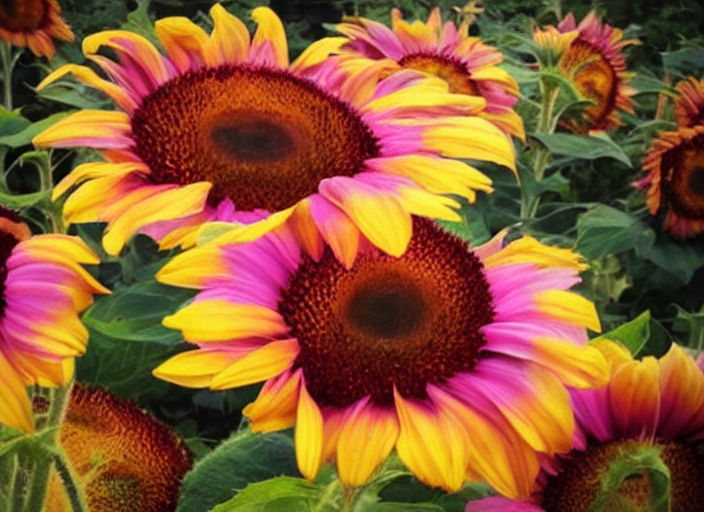

In [34]:
image

In [35]:
## 3rd trial: try to create a red dandelion


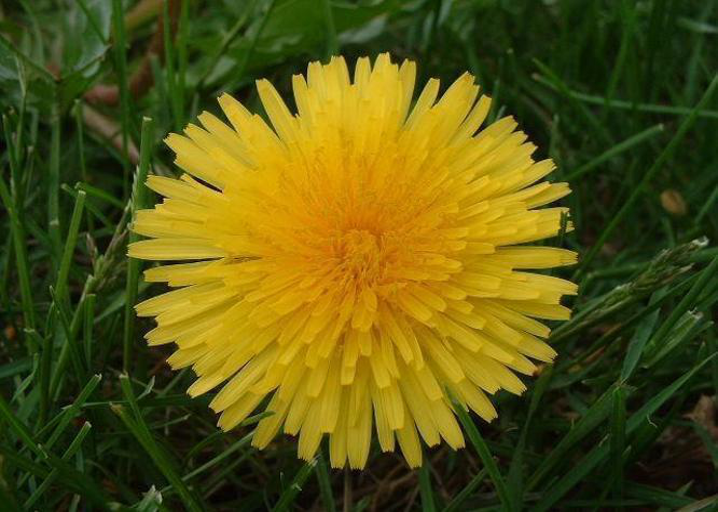

In [36]:
import io
import requests
from PIL import Image
r = requests.get('https://raw.githubusercontent.com/sud-hexo/text-to-image/main/image_06298.jpg', stream=True)
aux_im = Image.open(io.BytesIO(r.content))
aux_im = aux_im.resize((718, 512))
aux_im

In [39]:
prompt = 'red dandelion'
generator = torch.Generator(device=device).manual_seed(1024)
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=aux_im, strength=0.90, guidance_scale=5.0, generator=generator).images[0]

  0%|          | 0/46 [00:00<?, ?it/s]

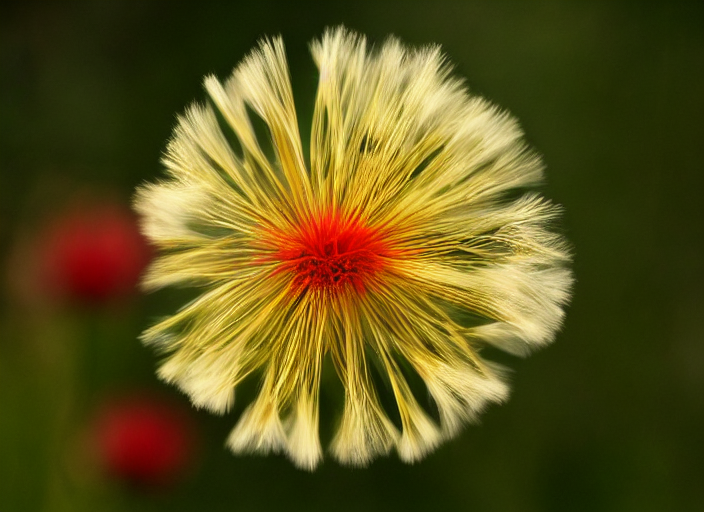

In [40]:
image